# Best-Selling Video Games

This project uses a dataset from Kaggle (https://www.kaggle.com/datasets/tayyarhussain/best-selling-video-games-of-all-time). We see the titles of the top 50 best-selling video games of all time along with their sales numbers (copies of the game sold) and other categories including:

Series <br>
Platform <br>
Initial Release Date <br>
Developer <br>
Publisher <br>
Date of Initial Release <br>

Given that there are only 50 entries within this dataset, we will not be able to draw generalized statistical conclusions. This project will be an exercise in visualizing the data provided.

---

## 1) Import the packages

In [1]:
#Import packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

---

## 2) Load the data

In [2]:
#Load data file

vg = pd.read_csv('VideoGames.csv')
vg

,Rank,Title,Sales,Series,Platform(s),Initial release date,Developer(s),Publisher(s)
0,1,Minecraft,238000000,Minecraft,Multi-platform,"November 18, 2011",Mojang Studios,Xbox Game Studios
1,2,Grand Theft Auto V,175000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
2,3,Tetris (EA),100000000,Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts
3,4,Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
4,5,PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,PUBG Corporation
5,6,Mario Kart 8 / Deluxe,60460000,Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD,Nintendo
6,7,Super Mario Bros.,58000000,Super Mario,Multi-platform,"September 13, 1985",Nintendo R&D4,Nintendo
7,8,Red Dead Redemption 2,50000000,Red Dead,Multi-platform,"October 26, 2018",Rockstar Studios,Rockstar Games
8,9,Pokémon Red / Green / Blue / Yellow,47520000,Pokémon,Multi-platform,"February 27, 1996",Game Freak,Nintendo
9,10,Terraria,44500000,None,Multi-platform,"May 16, 2011",Re-Logic,Re-Logic / 505 Games


---

## 3) Explore the dataset's structure

In this section we will look at the dataset's information including the number of rows it has, its columns and data types, and check for any missing data.

We will confirm the number of rows the dataset has.

In [3]:
#Confirm the dataset's total number of rows

len(vg)

50

This dataset contains the top 50 of best-selling video games as of April 2023, however, since the index column only goes up to rank 49, we will check for duplicates in this column.

In [4]:
#Check for the duplicates in "Rank" column


vg[vg['Rank'].duplicated() == True]

,Rank,Title,Sales,Series,Platform(s),Initial release date,Developer(s),Publisher(s)
15,15,The Witcher 3 / Hearts of Stone / Blood and Wine,40000000,The Witcher,Multi-platform,"May 19, 2015",CD Projekt Red,CD Projekt
23,23,Diablo III / Reaper of Souls,30000000,Diablo,Multi-platform,"May 16, 2012",Blizzard Entertainment,Blizzard Entertainment
24,23,The Elder Scrolls V: Skyrim,30000000,The Elder Scrolls,Multi-platform,"November 11, 2011",Bethesda Game Studios,Bethesda Softworks
42,42,Kinect Adventures!,24000000,None,Xbox 360,"November 4, 2010",Good Science Studio,Xbox Game Studios
49,49,Red Dead Redemption,23000000,Red Dead,PS3 / Xbox 360,"May 18, 2010",Rockstar San Diego,Rockstar Games


In the above table, we see which rows have duplicated ranks due to them having equivalent sales numbers to the row prior in the full dataset. This means that there are a total of 6 rows that have equivalent sales numbers. Also, even though there are equivalent ranks, these duplicates take the place of missing rank numbers. For instance, there are two video game titles with "Rank 15". However, there is no "Rank 16" in the dataset as it moves forward with "Rank 17" after the two titles tied for Rank 15.

We will confirm the dataset's columns and its data types. 

In [5]:
#Confirm the dataset's columns and data type info

vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  50 non-null     int64 
 1   Title                 50 non-null     object
 2   Sales                 50 non-null     int64 
 3   Series                50 non-null     object
 4   Platform(s)           50 non-null     object
 5   Initial release date  50 non-null     object
 6   Developer(s)          50 non-null     object
 7   Publisher(s)          50 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.2+ KB


We can see what the different column names are and the type of data within each in the above table.

We will also confirm if there are any null values within the dataset.

In [6]:
#Confirm if there are any null values within the dataset

vg.isnull().sum()

Rank                    0
Title                   0
Sales                   0
Series                  0
Platform(s)             0
Initial release date    0
Developer(s)            0
Publisher(s)            0
dtype: int64

We can confirm that there are no null values within this dataset.

---

## 4) Clean the dataset

In this section, we will clean up the dataset accordingly for analysis.

To proceed with the analyses, we will clean up the dataset's column names.

In [7]:
vg1 = vg.copy()
vg1.rename(columns = {'Platform(s)':'Platform', 'Initial release date':'ReleaseDate', 'Developer(s)':'Developer', 'Publisher(s)':'Publisher'}, inplace = True)
vg1

,Rank,Title,Sales,Series,Platform,ReleaseDate,Developer,Publisher
0,1,Minecraft,238000000,Minecraft,Multi-platform,"November 18, 2011",Mojang Studios,Xbox Game Studios
1,2,Grand Theft Auto V,175000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
2,3,Tetris (EA),100000000,Tetris,Multi-platform,"September 12, 2006",EA Mobile,Electronic Arts
3,4,Wii Sports,82900000,Wii,Wii,"November 19, 2006",Nintendo EAD,Nintendo
4,5,PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,"December 20, 2017",PUBG Corporation,PUBG Corporation
5,6,Mario Kart 8 / Deluxe,60460000,Mario Kart,Wii U / Switch,"May 29, 2014",Nintendo EAD,Nintendo
6,7,Super Mario Bros.,58000000,Super Mario,Multi-platform,"September 13, 1985",Nintendo R&D4,Nintendo
7,8,Red Dead Redemption 2,50000000,Red Dead,Multi-platform,"October 26, 2018",Rockstar Studios,Rockstar Games
8,9,Pokémon Red / Green / Blue / Yellow,47520000,Pokémon,Multi-platform,"February 27, 1996",Game Freak,Nintendo
9,10,Terraria,44500000,None,Multi-platform,"May 16, 2011",Re-Logic,Re-Logic / 505 Games


We will also change the ReleaseDate column's data type to "date time" for easier data manipulation.

In [8]:
vg1['ReleaseDate'] = pd.to_datetime(vg1['ReleaseDate'])

In [9]:
vg1['ReleaseDate']

0    2011-11-18
1    2013-09-17
2    2006-09-12
3    2006-11-19
4    2017-12-20
5    2014-05-29
6    1985-09-13
7    2018-10-26
8    1996-02-27
9    2011-05-16
10   2007-12-01
11   1989-06-14
12   1980-05-22
13   2020-03-20
14   2016-07-22
15   2015-05-19
16   2008-04-10
17   2009-06-25
18   2006-05-15
19   2017-03-03
20   2018-12-07
21   2009-11-11
22   2019-10-25
23   2012-05-16
24   2011-11-11
25   1999-11-21
26   1984-04-21
27   2006-12-02
28   2012-04-24
29   2004-10-26
30   1990-11-21
31   2011-11-08
32   2010-11-09
33   2012-09-18
34   2019-11-15
35   2016-11-18
36   2017-10-27
37   2008-04-29
38   2006-09-28
39   1988-10-23
40   2012-11-12
41   2017-09-29
42   2010-11-04
43   1991-06-23
44   2005-04-21
45   2012-11-18
46   2005-11-14
47   2002-11-21
48   2018-04-20
49   2010-05-18
Name: ReleaseDate, dtype: datetime64[ns]

We will assign the cleaned dataset to a new variable "vgclean" to proceed with the analyses.

In [10]:
vgclean = vg1
vgclean

,Rank,Title,Sales,Series,Platform,ReleaseDate,Developer,Publisher
0,1,Minecraft,238000000,Minecraft,Multi-platform,2011-11-18,Mojang Studios,Xbox Game Studios
1,2,Grand Theft Auto V,175000000,Grand Theft Auto,Multi-platform,2013-09-17,Rockstar North,Rockstar Games
2,3,Tetris (EA),100000000,Tetris,Multi-platform,2006-09-12,EA Mobile,Electronic Arts
3,4,Wii Sports,82900000,Wii,Wii,2006-11-19,Nintendo EAD,Nintendo
4,5,PUBG: Battlegrounds,75000000,PUBG Universe,Multi-platform,2017-12-20,PUBG Corporation,PUBG Corporation
5,6,Mario Kart 8 / Deluxe,60460000,Mario Kart,Wii U / Switch,2014-05-29,Nintendo EAD,Nintendo
6,7,Super Mario Bros.,58000000,Super Mario,Multi-platform,1985-09-13,Nintendo R&D4,Nintendo
7,8,Red Dead Redemption 2,50000000,Red Dead,Multi-platform,2018-10-26,Rockstar Studios,Rockstar Games
8,9,Pokémon Red / Green / Blue / Yellow,47520000,Pokémon,Multi-platform,1996-02-27,Game Freak,Nintendo
9,10,Terraria,44500000,None,Multi-platform,2011-05-16,Re-Logic,Re-Logic / 505 Games


---

## 5) Visualize the dataset

#### First, we will take a look at the dataset's statistical summary of its numerical values.

In [11]:
#Dataset's Statistical Summary

vgclean.describe()

,Rank,Sales
count,50.000000,5.000000e+01
mean,25.380000,4.198654e+07
std,14.540429,3.805935e+07
min,1.000000,2.300000e+07
25%,13.250000,2.503000e+07
50%,24.500000,2.974500e+07
75%,37.750000,4.195123e+07
max,49.000000,2.380000e+08


Under the Sales column, we can see relevant statistical figures such as the maximum amount of sales (2.38 hundred million), the minimum amount (23 million), and the average amount (42 million).

#### We will visualize the distribution plot of the individual sales numbers.

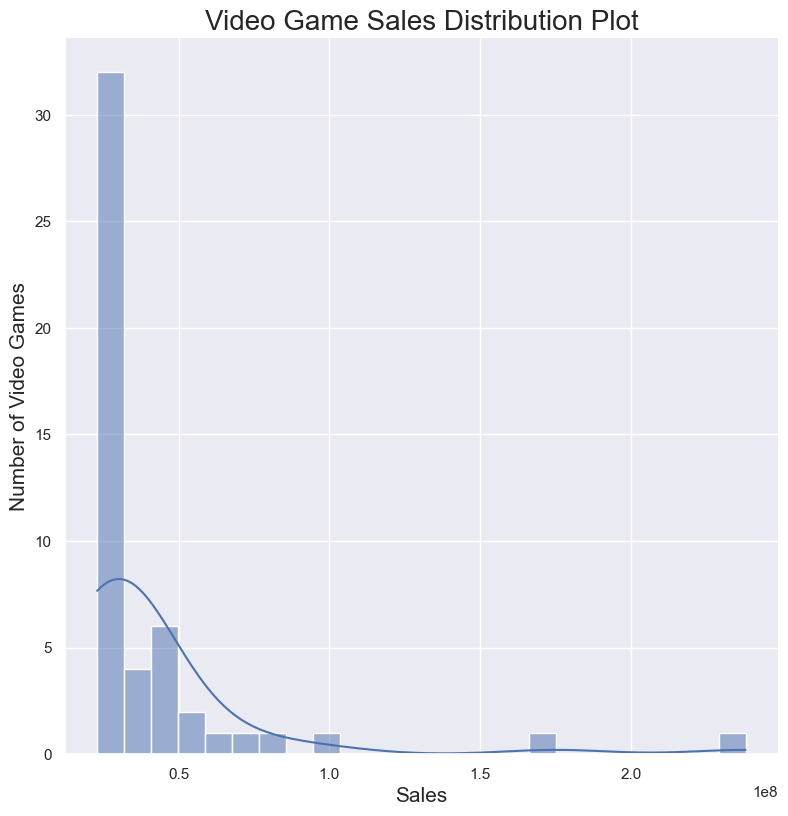

In [12]:
#Sales (Dollars) Distribution Plot

sns.displot(vgclean.Sales, height = 8, kde = True)
plt.title('Video Game Sales Distribution Plot', fontsize = 20)
plt.xlabel('Sales', fontsize = 15)
plt.ylabel('Number of Video Games', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

We can see that the sales distribution is right-skewed, with most sales falling under 20-40 million copies.

#### We will now visualize each categorical data's count and sales numbers.

This will include the following categories:

Titles <br>
Series <br>
Platform <br>
Developer <br>
Publisher <br>

We will also create a distribution plot for the video games' initial year of release.

#### Video Game Title Sales

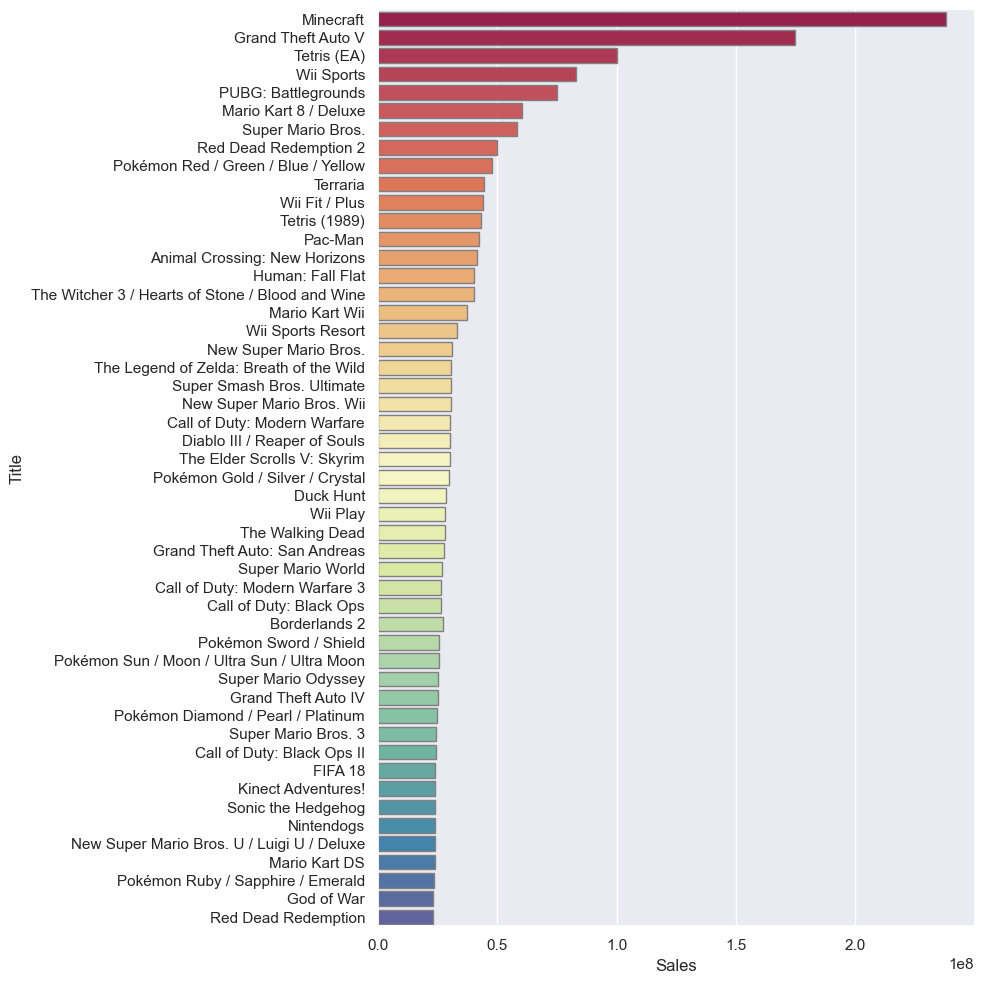

In [13]:
#Video Game Title Sales

sns.catplot(
    data = vgclean, x = "Sales", y = "Title", height = 10, kind = "bar",
    palette = "Spectral", edgecolor = "0.5"
)

We see the video game titles' sales numbers, with Minecraft being the top-selling game at 238 million copies.

#### Video Game Series Count and Total Sales

#### Video Game Series Count

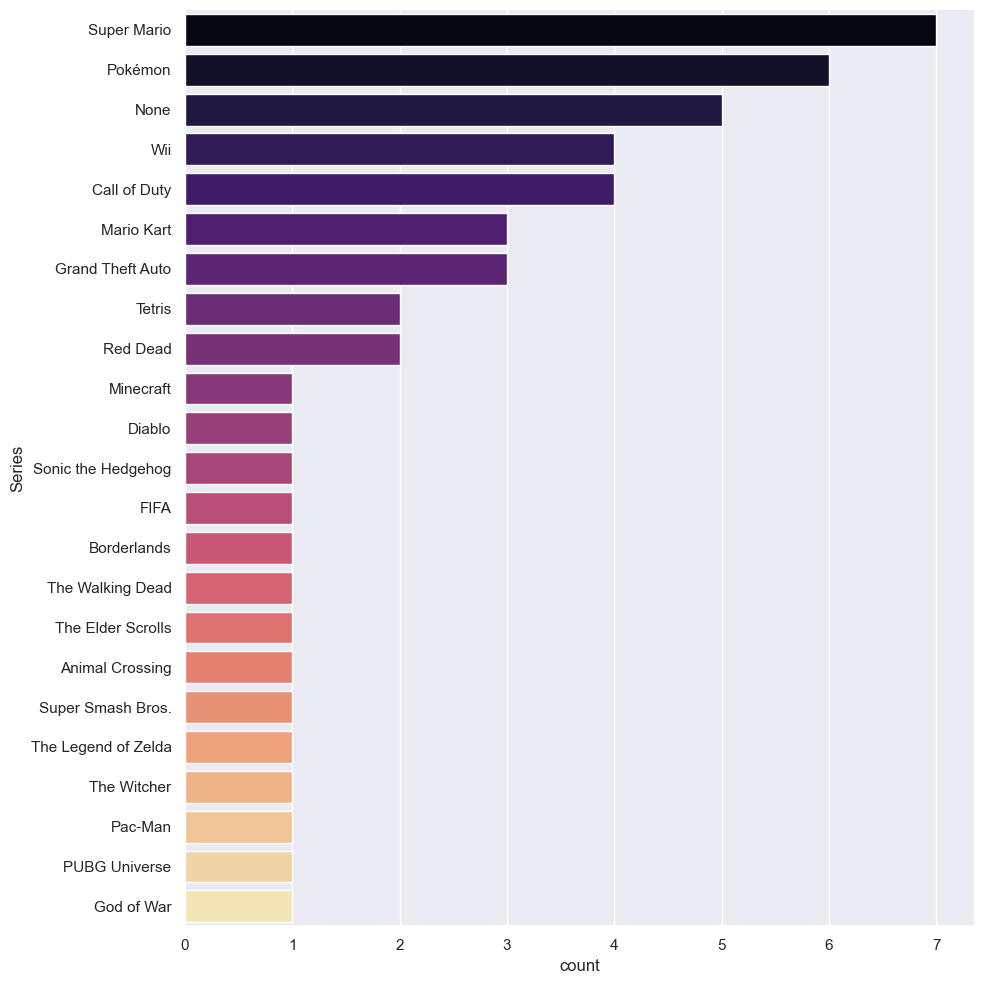

In [14]:
#Video Game Series Count

sns.catplot(
    data = vgclean, y = "Series", height = 10, kind = "count",
    order = vgclean['Series'].value_counts().index,
    palette = "magma",
)

We can see the series by number of video game titles they have in the top 50. Super Mario has 7 and Pokemon has 6. There are 5 video game titles that do not belong to a series. Wii and Call of Duty both have 4 titles.

#### Video Game Series Total Sales

First, we will create an aggregated table (pivot table) of each series' total sales. This will be repeated for the remaining categorical variables.

In [15]:
#Series and Total Sales Pivot Table

SeriesSales = pd.pivot_table(vgclean, values = 'Sales', index = 'Series', aggfunc = 'sum')
SeriesSalesPivot = (SeriesSales.sort_values(by = 'Sales', ascending = False))
SeriesSalesPivot

,Sales
Series,
Minecraft,238000000
Grand Theft Auto,227500000
Super Mario,218972500
Wii,187860000
Pokémon,176110000
None,160760000
Tetris,143000000
Mario Kart,121440000
Call of Duty,106900000


Next, plot the series total sales aggregated table. These steps will be repeated for the remaining categorical variables.

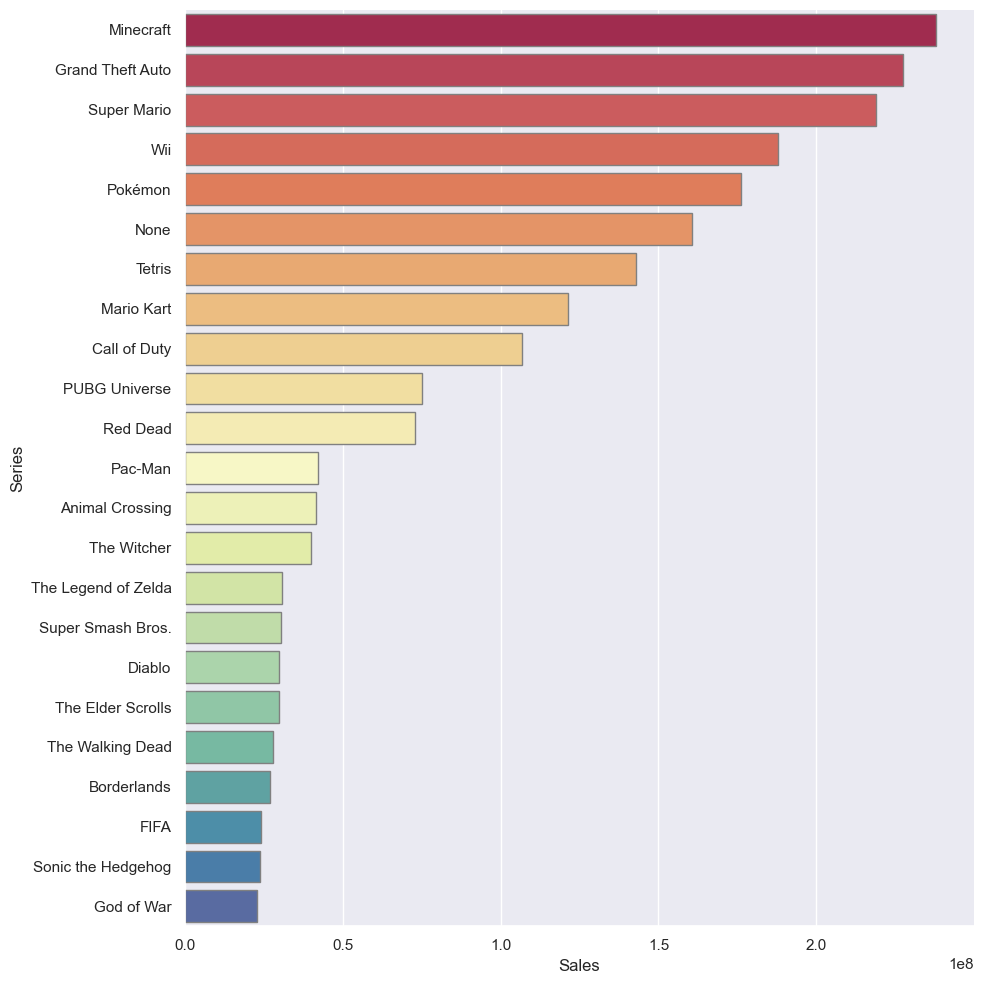

In [16]:
#Series and Total Sales Bar Plot

sns.catplot(
    data = SeriesSalesPivot.reset_index(), x = "Sales", y = "Series",
    kind = "bar", height = 10,
    palette = "Spectral", edgecolor = "0.5"
)

We can see the series by their aggregated total sales from their video game titles. Minecraft, Grand Theft Auto, and Super Mario make up the top 3.

#### Video Game Developer Count and Total Sales

#### Video Game Developer Count

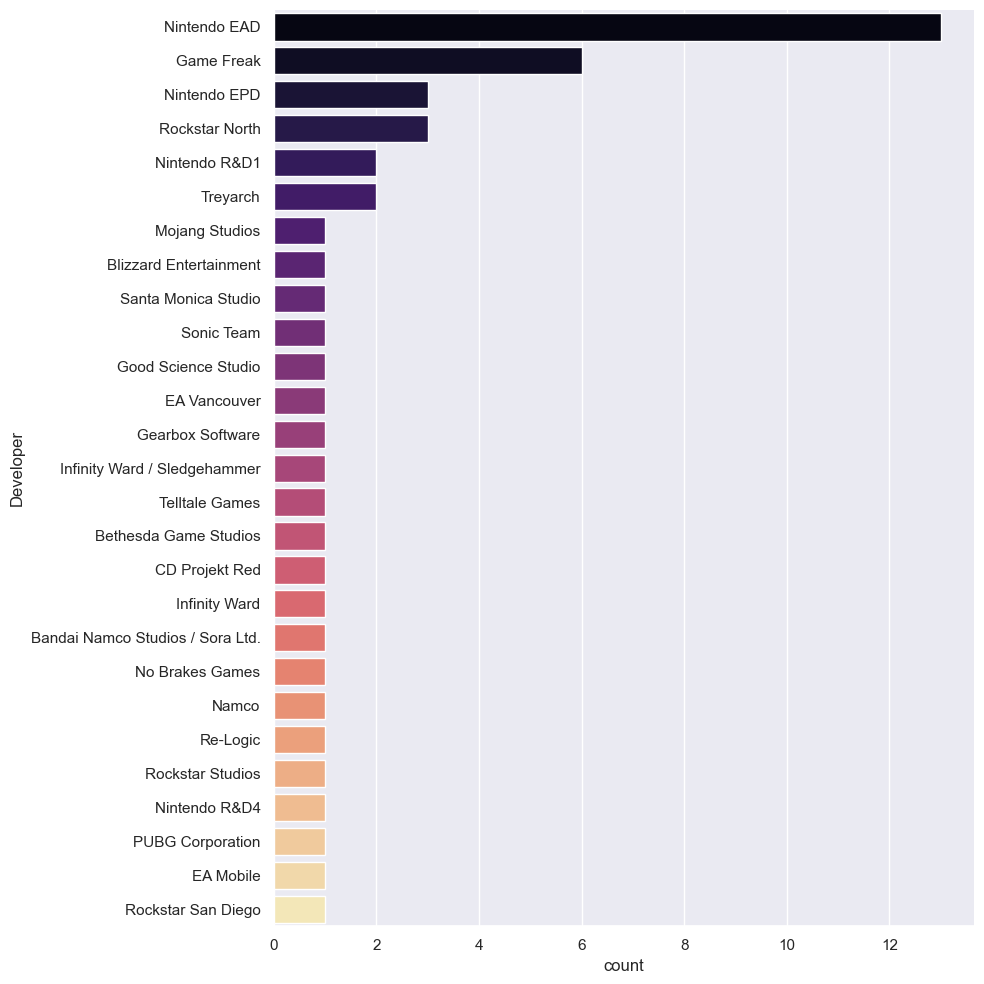

In [17]:
#Video Game Developer Count

sns.catplot(
    data = vgclean, y = "Developer", height = 10, kind = "count",
    order = vgclean['Developer'].value_counts().index,
    palette = "magma",
)

We can see the developers by number of video game titles they have in the top 50. Nintendo EAD has the most with 12, followed by Game Freak at 6, then by Nintendo EPD and Rockstar North both at 3.

#### Video Game Developer and Total Sales

In [18]:
#Developer and Total Sales Pivot Table

DeveloperSales = pd.pivot_table(vgclean, values = 'Sales', index = 'Developer', aggfunc = 'sum')
DeveloperSalesPivot = (DeveloperSales.sort_values(by = 'Sales', ascending = False))
DeveloperSalesPivot

,Sales
Developer,
Nintendo EAD,469112500
Mojang Studios,238000000
Rockstar North,227500000
Game Freak,176110000
EA Mobile,100000000
Nintendo EPD,97410000
PUBG Corporation,75000000
Nintendo R&D1,71300000
Nintendo R&D4,58000000


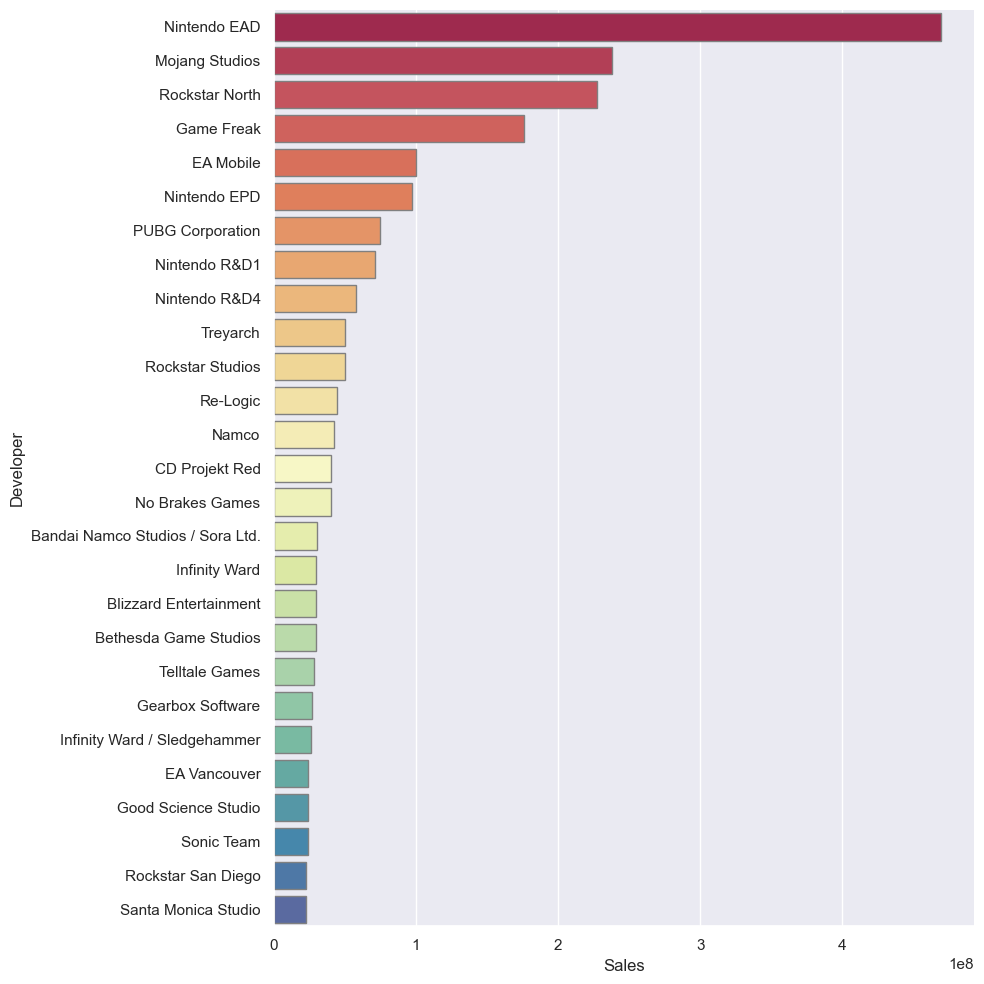

In [19]:
#Developer and Total Sales Bar Plot

sns.catplot(
    data = DeveloperSalesPivot.reset_index(), x = "Sales", y = "Developer",
    kind = "bar", height = 10,
    palette = "Spectral", edgecolor = "0.5"
)

We can see the developers by their aggregated total sales from their video game titles. Nintendo EAD, Mojang Studios, and Rockstar North make up the top 3.

#### Video Game Publisher Count and Total Sales

#### Video Game Publisher Count

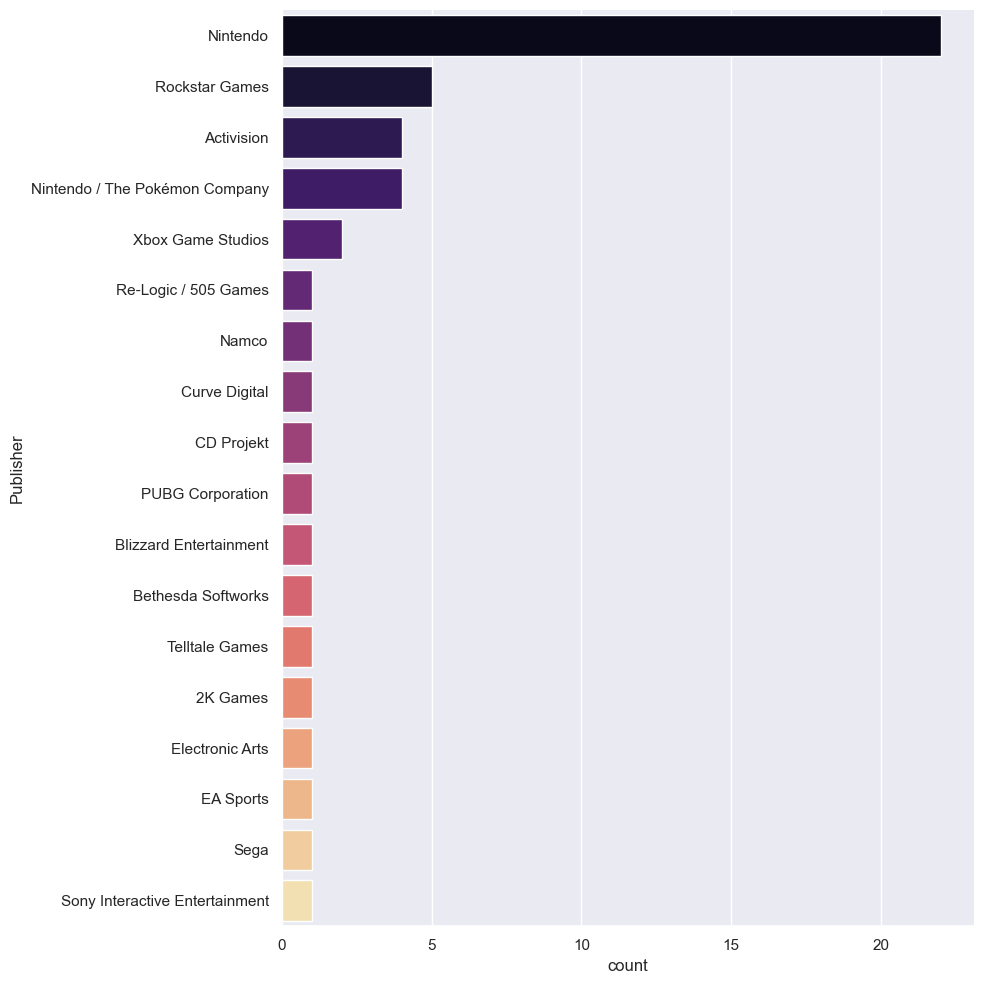

In [20]:
#Video Game Publisher Count

sns.catplot(
    data = vgclean, y = "Publisher", height = 10, kind = "count",
    order = vgclean['Publisher'].value_counts().index,
    palette = "magma",
)

We can see the publishers by number of video game titles they have in the top 50. Nintendo has the most with 20+, followed by Rockstar Games at 5, then by Activision and Nintendo/The Pokemon Company both at 4.

#### Video Game Publisher and Total Sales

In [21]:
#Publisher and Total Sales Pivot Table

PublisherSales = pd.pivot_table(vgclean, values = 'Sales', index = 'Publisher', aggfunc = 'sum')
PublisherSalesPivot = (PublisherSales.sort_values(by = 'Sales', ascending = False))
PublisherSalesPivot

,Sales
Publisher,
Nintendo,803272500
Rockstar Games,300500000
Xbox Game Studios,262000000
Activision,106900000
Electronic Arts,100000000
Nintendo / The Pokémon Company,99100000
PUBG Corporation,75000000
Re-Logic / 505 Games,44500000
Namco,42071635


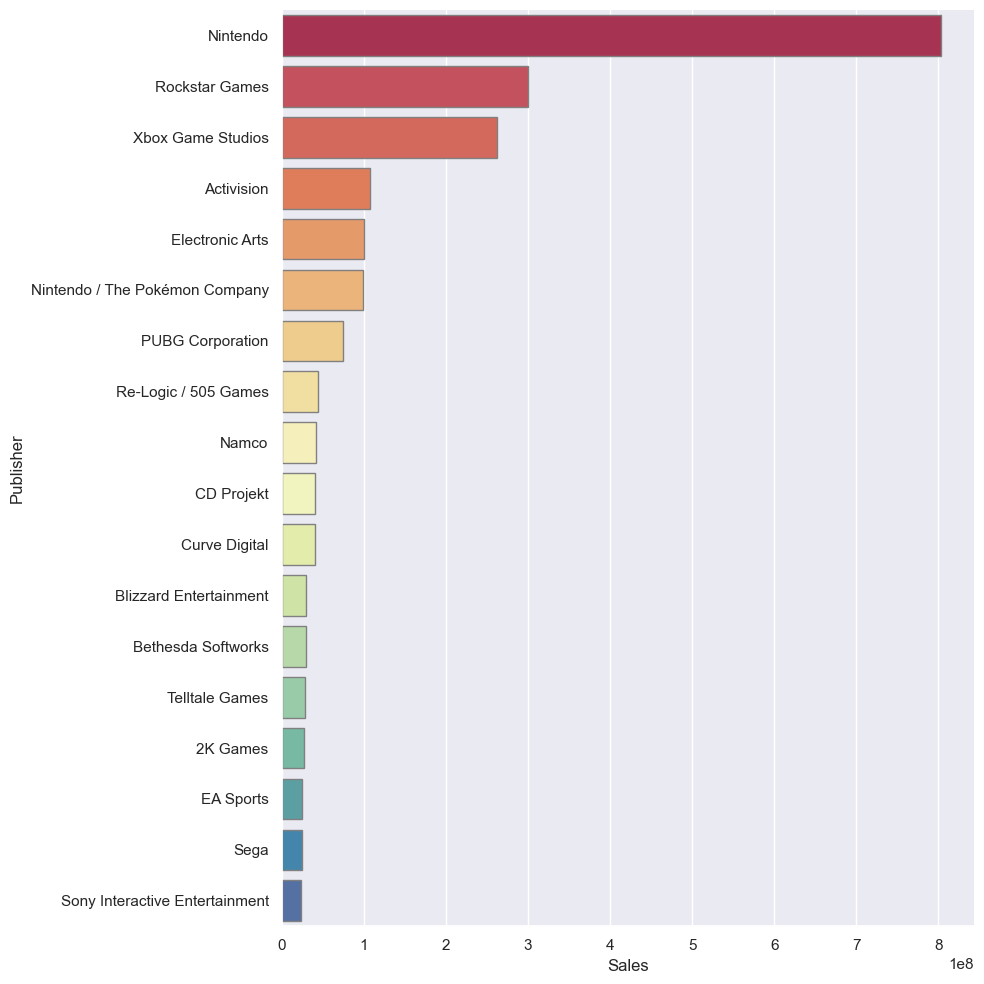

In [22]:
#Publisher and Total Sales Bar Plot

sns.catplot(
    data = PublisherSalesPivot.reset_index(), x = "Sales", y = "Publisher",
    kind = "bar", height = 10,
    palette = "Spectral", edgecolor = "0.5"
)

We can see the publishers by their aggregated total sales from their video game titles. Nintendo, Rockstar Games, and Xbox Game Studios make up the top 3.

#### Video Game Platform Count and Total Sales

#### Video Game Platform Count

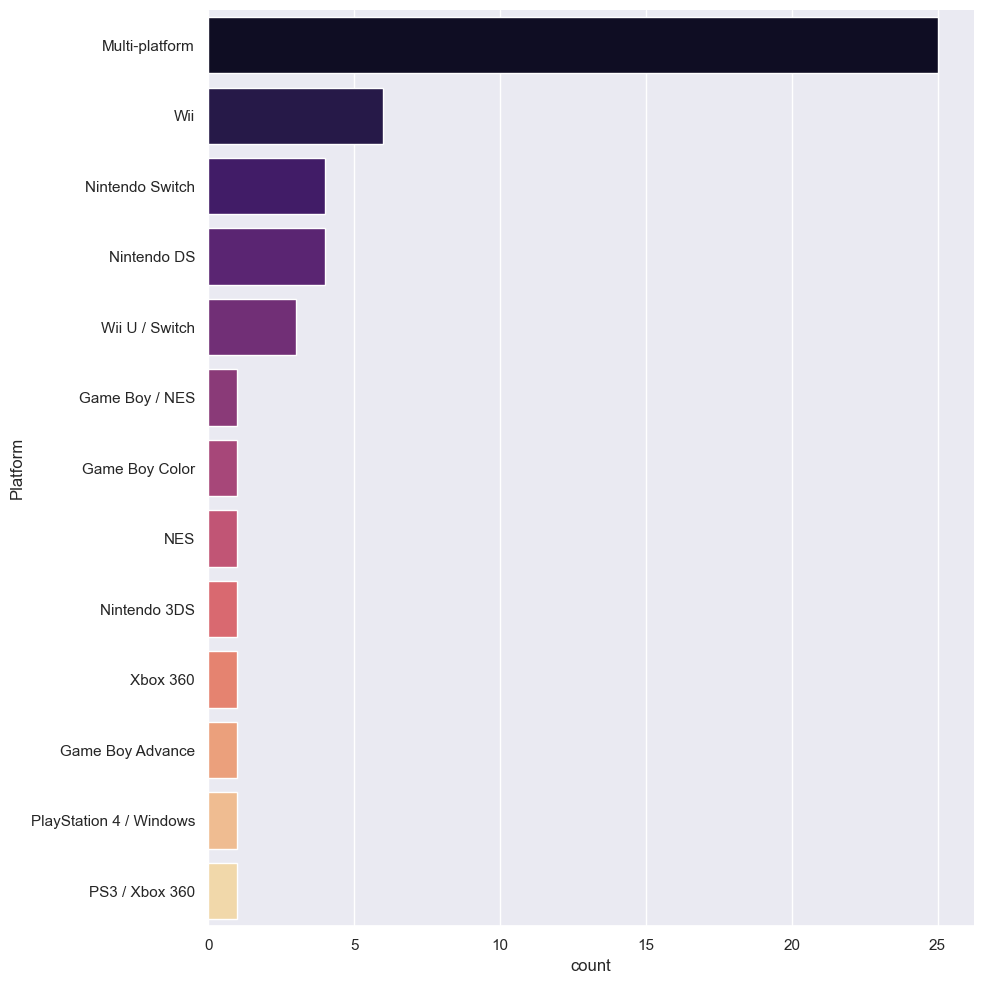

In [23]:
#Video Game Platforms Count

sns.catplot(
    data = vgclean, y = "Platform", height = 10, kind = "count",
    order = vgclean['Platform'].value_counts().index,
    palette = "magma",
)

We can see the platforms by number of video game titles they have in the top 50. Multi-platform games have the most at 25, followed by Wii with 6, then by Nintendo Switch and Nintendo DS both with 4.

#### Video Game Platform and Total Sales

In [24]:
#Platform and Total Sales Pivot Table

PlatformSales = pd.pivot_table(vgclean, values='Sales', index='Platform', aggfunc='sum')
PlatformSalesPivot = (PlatformSales.sort_values(by = 'Sales', ascending = False))
PlatformSalesPivot

,Sales
Platform,
Multi-platform,1283567095
Wii,255560000
Nintendo Switch,122830000
Wii U / Switch,114800000
Nintendo DS,103090000
Game Boy / NES,43000000
Game Boy Color,29490000
NES,28300000
Nintendo 3DS,25410000


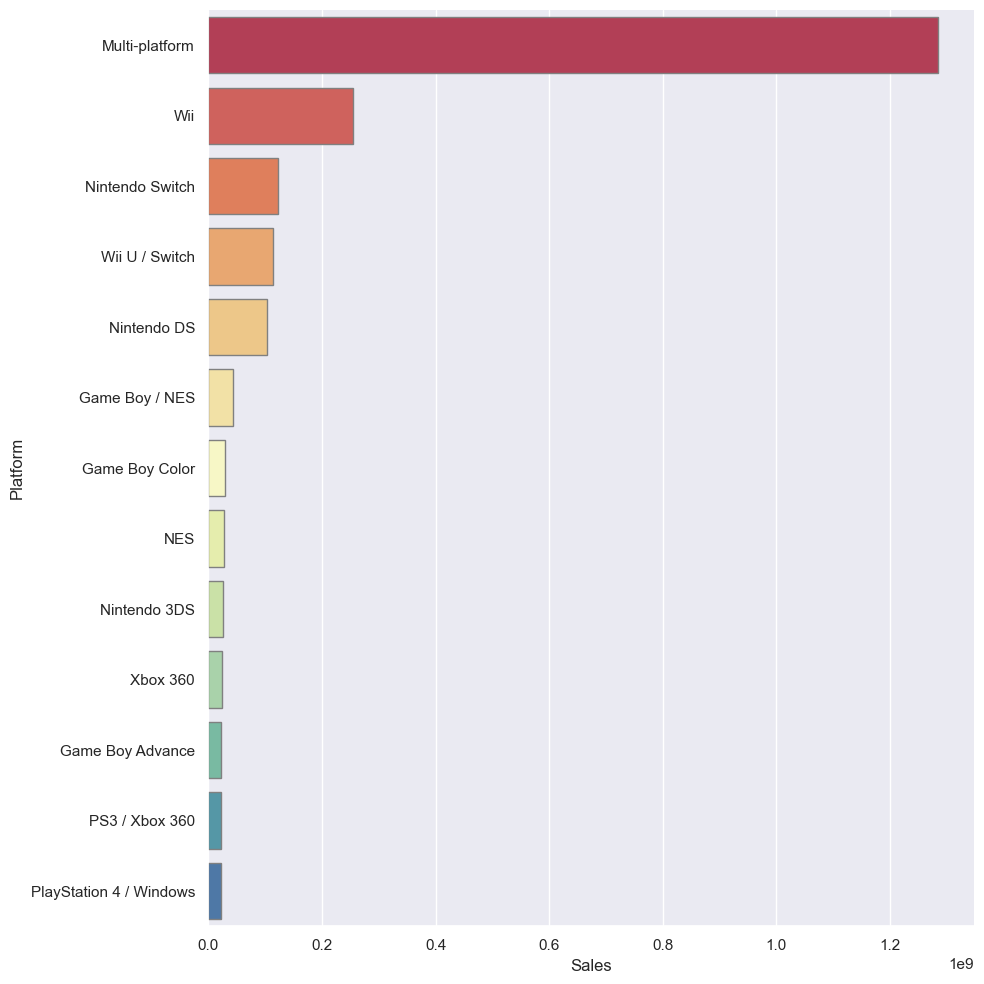

In [25]:
#Platform and Total Sales Bar Plot

sns.catplot(
    data = PlatformSalesPivot.reset_index(), x = "Sales", y = "Platform",
    kind = "bar", height = 10,
    palette = "Spectral", edgecolor = "0.5"
)

We can see the platforms by their aggregated total sales from their associated video game titles. Multi-platform, Wii, and Nintendo Switch make up the top 3.

#### Video Game Year of Initial Release

#### Lastly, we will plot the distribution of the video games' year of initial release.

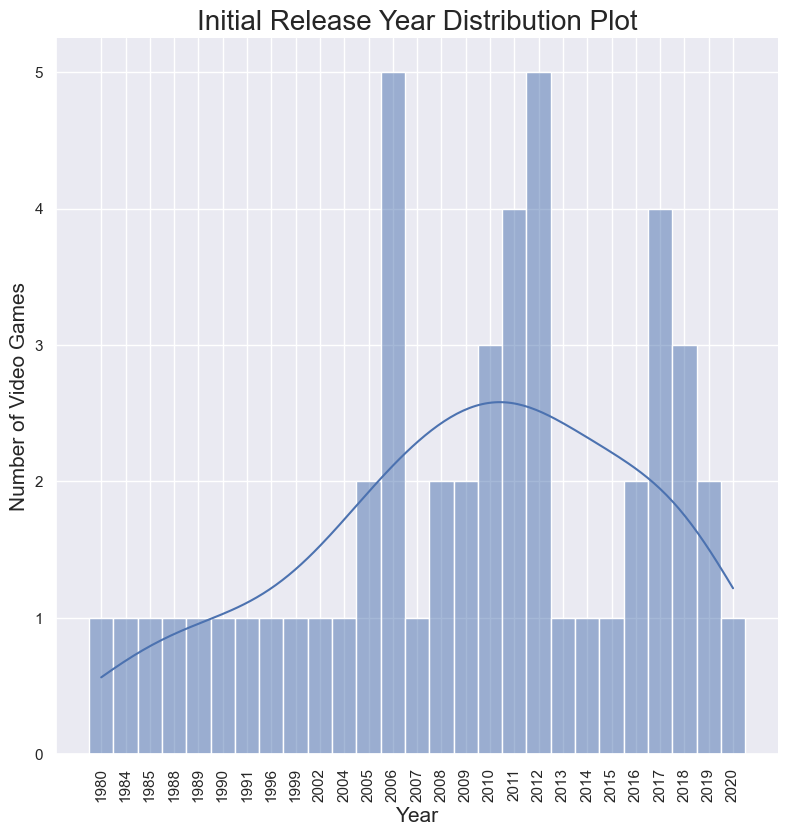

In [26]:
#Sales (Dollars) Distribution Plot

sns.displot(vgclean.ReleaseDate.dt.strftime('%Y').sort_values(), height = 8, kde = True)
plt.title('Initial Release Year Distribution Plot', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Video Games', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

We can see the years of when the top 50 video games were released. 2006 and 2012 both have 5 games. 2011 and 2017 both have 4. 2010 and 2018 both have 3.

*Note that I decided not to aggregate total sales by year (like the other categories) as the resulting visualization can lead to confusion. Since the year category represents the year of initial release, aggregating the total sales (over time/multiple years, presumably) against this initial year release might result in a misleading visualization.

---

## 6) Conclusion

Based on the analyses performed in this project, below are the key takeaways:<br><br>

1. Of the top 50 best-selling video games, <b>Minecraft sold the most</b> with 238 million copies and <b>Red Dead Redemption sold the least</b> with 23 million copies. <br>
<br>
2. The top 3 <b>series</b> with the most titles are: <br><br>
    1) <b>Super Mario:</b> 7 <br>
    2) <b>Pokemon:</b> 6 <br>
    3) <b>Does not belong to a series:</b> 5 <br>
      *<b>Wii</b> and <b>Call of Duty</b> are tied for fourth with 4 <br>
<br>    
   The top 3 <b>series</b> with the most total sales are: <br><br>
    1) <b>Minecraft:</b> 238 million <br>
    2) <b>Grand Theft Auto:</b> 227.5 million <br>
    3) <b>Super Mario:</b> ~219 million <br>
<br>    
3. The top 3 <b>developers</b> with the most titles are: <br><br>
    1) <b>Nintendo EAD:</b> 13 <br>
    2) <b>Game Freak:</b> 6 <br>
    3) <b>Nintendo EPD, Rockstar North:</b> 3 <br>
<br>    
   The top 3 <b>developers</b> with the most total sales are: <br><br>
    1) <b>Nintendo EAD:</b> ~469 million <br>
    2) <b>Mojang Studios:</b> 238 million <br>
    3) <b>Rockstar North:</b> ~227.5 million <br>
<br>
Some noteable names under the above developers include: Super Mario (Nintendo EAD), Pokemon (Game Freak), The Legend of Zelda and Animal Crossing (Nintendo EPD), Grand Theft Auto (Rockstar North), and Minecraft (Mojang Studios).
<br>
<br>
4. The top 3 <b>publishers</b> with the most titles are: <br><br>
    1) <b>Nintendo:</b> 23 <br>
    2) <b>Rockstar Games:</b> 5 <br>
    3) <b>Activision, Nintendo/The Pokemon Company:</b> 4 <br>
<br>
   The top 3 <b>publishers</b> with the most total sales are: <br><br>
    1) <b>Nintendo:</b> ~803 million <br>
    2) <b>Rockstar Games:</b> ~301 million <br>
    3) <b>Xbox Game Studios:</b> ~107 million <br>
<br>   
Some noteable names under the above publishers include: Super Mario, The Legend of Zelda, and Wii Sports (Nintendo), Grand Theft Auto (Rockstar Games), Call of Duty (Activision), Pokemon (Nintendo/The Pokemon Company), and Minecraft (Xbox Game Studios).
<br>
<br>
5. The top 3 <b>platforms</b> with the most titles are: <br><br>
    1) <b>Multi-platform:</b> 25 <br>
    2) <b>Wii:</b> 6 <br>
    3) <b>Nintendo Switch, Nintendo DS:</b> 4 <br>
<br>    
   The top 3 <b>platforms</b> with the most total sales are: <br><br>
    1) <b>Multi-platform:</b> ~1.3 billion <br>
    2) <b>Wii:</b> ~256 million <br>
    3) <b>Nintendo Switch:</b> ~123 million <br>
<br>
Some noteable names under the above platforms include: Super Mario, Pokemon, Pac-Man, Tetris, Sonic the Hedghog, Call of Duty, Grand Theft Auto (Multi-platform) and Minecraft, Wii Sports and Wii Fit (Wii), and Super Mario, Pokemon, and Animal Crossing (Nintendo).
<br>
<br>
6. The top <b>years</b> (of initial release) with the most titles are: <br><br>
    1) <b>2006, 2012:</b> 5 <br>
    2) <b>2011, 2017:</b> 4 <br>
    3) <b>2010, 2018:</b> 3 <br>
<br>
Some noteable titles under the above years include: Pokemon Diamond/Pearl/Platinum, New Super Mario Bros., Tetris, Wii Play and Wii Sports (2006), Call of Duty: Black Ops II and New Super Mario Bros. U/Luigi U/Deluxe (2012), Call of Duty: Modern Warfare 3 and Minecraft (2011), PUBG: Battlegrounds, Super Mario Odyssey, and The Legend of Zelda: Breath of the Wild (2017), Call of Duty: Black Ops and Kinect Adventures! (2010), and Red Dead Redemption 2 and Super Smash Bros. Ultimate (2018).